# Tiền xử lý

In [1]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_excel('raw_data.xlsx', sheet_name='country', index_col =0)
df.head()

,"Country, Other",Total Cases,New Cases,Total Deaths,New Death,Total Recovered,Active Case,Serious Critical,Tot Cases/1M pop,Death/1M pop,Total test,Test/1M pop,Population,Time
#,,,,,,,,,,,,,,
1,USA,"32,297,655","+81,600","580,018",+902,"24,840,359","6,877,278","9,816","97,123","1,744","426,562,606","1,282,731","332,542,637",2021-04-16
2,India,"14,521,683","+233,943","175,673","+1,338","12,666,889","1,679,121","8,944","10,442",126,"263,476,625","189,449","1,390,753,234",2021-04-16
3,Brazil,"13,834,342","+76,249","369,024","+3,070","12,298,863","1,166,455","8,318","64,720","1,726","28,600,000","133,796","213,757,680",2021-04-16
4,France,"5,224,321","+36,442","100,404",+313,"4,046,518","1,077,399","5,914","79,897","1,536","71,424,719","1,092,317","65,388,253",2021-04-16
5,Russia,"4,684,148","+8,995","104,795",+397,"4,310,557","268,796","2,300","32,087",718,"125,100,000","856,942","145,984,203",2021-04-16


In [3]:
df.dtypes

Country, Other              object
Total Cases                 object
New Cases                   object
Total Deaths                object
New Death                   object
Total Recovered             object
Active Case                 object
Serious Critical            object
Tot Cases/1M pop            object
Death/1M pop                object
Total test                  object
Test/1M pop                 object
Population                  object
Time                datetime64[ns]
dtype: object

- Xóa những ô trống

In [4]:
df = df.replace(np.nan, "0")
df = df.replace([""," "], "0")

- Chuẩn hóa các cột dữ liệu từ dạng chuỗi sang dạng số

In [5]:
num_cols=['Total Cases', 'New Cases', 'Total Deaths', 
          'New Death', 'Total Recovered', 'Active Case', 
          'Serious Critical', 'Tot Cases/1M pop', 'Death/1M pop', 
          'Total test', 'Test/1M pop', 'Population']

for col in num_cols:
    df[col]=df[col].str.replace(',', '')
    df[col]=pd.to_numeric(df[col])

- Lưu dữ liệu sau khi chuẩn hóa vào file `data.xlsx`

In [6]:
writer = pd.ExcelWriter("data.xlsx", engine='xlsxwriter',datetime_format = "YYYY-MM-DD")
df.to_excel(writer, sheet_name= "country")
writer.save()

In [7]:
df.dtypes

Country, Other              object
Total Cases                  int64
New Cases                    int64
Total Deaths                 int64
New Death                    int64
Total Recovered              int64
Active Case                  int64
Serious Critical             int64
Tot Cases/1M pop             int64
Death/1M pop                 int64
Total test                   int64
Test/1M pop                  int64
Population                   int64
Time                datetime64[ns]
dtype: object

In [8]:
df.head()

,"Country, Other",Total Cases,New Cases,Total Deaths,New Death,Total Recovered,Active Case,Serious Critical,Tot Cases/1M pop,Death/1M pop,Total test,Test/1M pop,Population,Time
#,,,,,,,,,,,,,,
1,USA,32297655,81600,580018,902,24840359,6877278,9816,97123,1744,426562606,1282731,332542637,2021-04-16
2,India,14521683,233943,175673,1338,12666889,1679121,8944,10442,126,263476625,189449,1390753234,2021-04-16
3,Brazil,13834342,76249,369024,3070,12298863,1166455,8318,64720,1726,28600000,133796,213757680,2021-04-16
4,France,5224321,36442,100404,313,4046518,1077399,5914,79897,1536,71424719,1092317,65388253,2021-04-16
5,Russia,4684148,8995,104795,397,4310557,268796,2300,32087,718,125100000,856942,145984203,2021-04-16


- Tính Correlation giữa các trường trong dữ liệu.

In [9]:
df.corr()

,Total Cases,New Cases,Total Deaths,New Death,Total Recovered,Active Case,Serious Critical,Tot Cases/1M pop,Death/1M pop,Total test,Test/1M pop,Population
Total Cases,1.000000,0.630262,0.947141,0.667614,0.997698,0.951754,0.817420,0.207022,0.271891,0.882230,0.043141,0.423837
New Cases,0.630262,1.000000,0.495320,0.708727,0.653851,0.501049,0.677265,0.055733,0.081219,0.619027,-0.019567,0.665509
Total Deaths,0.947141,0.495320,1.000000,0.706097,0.950043,0.868171,0.835851,0.209139,0.345832,0.779281,0.028717,0.340833
New Death,0.667614,0.708727,0.706097,1.000000,0.702657,0.467288,0.757277,0.125331,0.243671,0.448873,-0.040077,0.442863
Total Recovered,0.997698,0.653851,0.950043,0.702657,1.000000,0.928877,0.832649,0.211381,0.280926,0.876575,0.043539,0.439430
Active Case,0.951754,0.501049,0.868171,0.467288,0.928877,1.000000,0.696441,0.174455,0.207010,0.861569,0.040181,0.337297
Serious Critical,0.817420,0.677265,0.835851,0.757277,0.832649,0.696441,1.000000,0.203724,0.343710,0.663301,-0.012505,0.435931
Tot Cases/1M pop,0.207022,0.055733,0.209139,0.125331,0.211381,0.174455,0.203724,1.000000,0.819820,0.144954,0.476245,-0.083659
Death/1M pop,0.271891,0.081219,0.345832,0.243671,0.280926,0.207010,0.343710,0.819820,1.000000,0.181774,0.296420,-0.038400
Total test,0.882230,0.619027,0.779281,0.448873,0.876575,0.861569,0.663301,0.144954,0.181774,1.000000,0.109905,0.635215


- Lấy dữ liệu ngày 16/4/2021

In [10]:
df_day_16 = df[df["Time"] == np.datetime64("2021-04-16")]

---

# Code vẽ biểu đồ để trả lời câu hỏi.

###  1. Tỉ lệ giữa số ca đang nhiễm, số người chết, số người được chữa trị giữa Việt Nam và Italy?

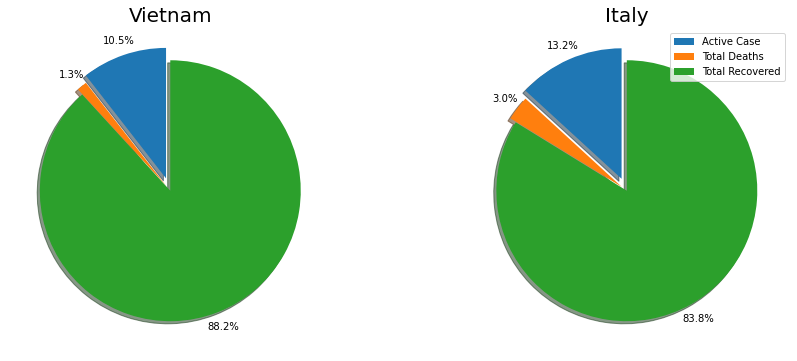

In [11]:
def draw_pie(countries):
    explode_list = [0.1, 0.05, 0]
    fig , axes = plt.subplots(1, len(countries))
    plt.gcf().set_size_inches(15, 6)
    
    
    for i in range(len(countries)):
        df = df_day_16[df_day_16["Country, Other"] == countries[i]][["Active Case", "Total Deaths", "Total Recovered"]]
        axes[i].pie(df.iloc[0], 
                    autopct="%1.1f%%", 
                    explode=explode_list,
                    shadow=True,
                    pctdistance=1.12,
                    startangle=90)
        axes[i].set_title(countries[i], fontsize=20)
    
    plt.legend(labels=df.columns, loc='upper right')
    plt.show()

draw_pie(["Vietnam", "Italy"])
        

---

### 2. Tình hình diễn biến dịch bệnh ở Việt Nam và các nước có đường biên giới giáp với Việt Nam trong thời gian qua?

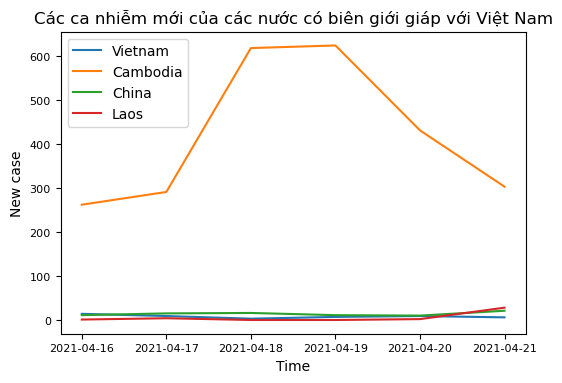

In [12]:
def draw_lines(df, countries, title):
    plt.rcParams['figure.dpi'] = 100
    
    for country in countries:
        df_country = df[df["Country, Other"] == country]
        plt.plot(df_country["Time"], df_country["New Cases"], label = country)
    
    plt.xlabel("Time")
    plt.ylabel("New case")
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.legend()
    plt.title(title)
    plt.show()

draw_lines(df, ["Vietnam", "Cambodia", "China", "Laos"], "Các ca nhiễm mới của các nước có biên giới giáp với Việt Nam")

---

### 3. Xem xét và so sánh tình hình dịch bệnh từ trước đến giờ giữa các nước Đông Nam Á với nhau?


In [13]:
SEA_Countries = {'Indonesia', 'Philippines', 
               'Malaysia', 'Myanmar',
               'Singapore', 'Thailand', 
               'Cambodia', 'Vietnam',
               'Timor-Leste', 'Brunei',
               'Laos'}

df_SEA = df_day_16[df_day_16["Country, Other"].isin(SEA_Countries)]
df_SEA

,"Country, Other",Total Cases,New Cases,Total Deaths,New Death,Total Recovered,Active Case,Serious Critical,Tot Cases/1M pop,Death/1M pop,Total test,Test/1M pop,Population,Time
#,,,,,,,,,,,,,,
19,Indonesia,1594722,5363,43196,123,1444229,107297,0,5782,157,13732975,49791,275814395,2021-04-16
27,Philippines,914951,10706,15738,145,705733,193480,750,8263,142,11036556,99666,110735003,2021-04-16
45,Malaysia,370528,2551,1365,2,350563,18600,227,11333,42,8472685,259150,32694152,2021-04-16
82,Myanmar,142617,7,3206,0,131884,7527,0,2607,59,2557724,46760,54699109,2021-04-16
102,Singapore,60769,34,30,0,60446,293,2,10323,5,9036706,1535074,5886820,2021-04-16
111,Thailand,39038,1585,97,0,28480,10461,1,558,1,8124896,116171,69939103,2021-04-16
162,Cambodia,5480,262,38,2,2393,3049,0,324,2,788973,46679,16901990,2021-04-16
177,Vietnam,2772,14,35,0,2445,292,0,28,0,2598753,26509,98032653,2021-04-16
191,Timor-Leste,1193,55,2,0,624,567,0,891,1,54468,40700,1338266,2021-04-16


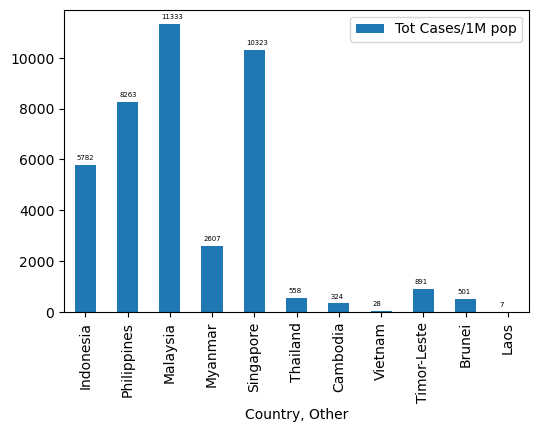

In [14]:
#plt.rcParams['figure.dpi'] = 100
df_SEA.plot(kind='bar', x='Country, Other', y='Tot Cases/1M pop')
for i, v in enumerate(df_SEA['Tot Cases/1M pop']):
    plt.text(i-0.2, v+200, str(v), fontsize=5)
plt.show()

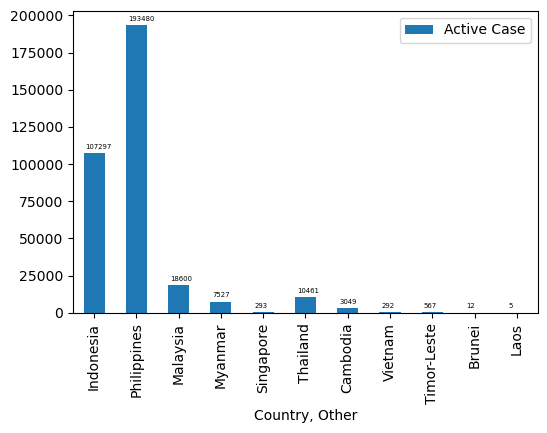

In [15]:
#plt.rcParams['figure.dpi'] = 150
df_SEA.plot(kind='bar', x='Country, Other', y='Active Case')
for i, v in enumerate(df_SEA['Active Case']):
    plt.text(i-0.2, v+3000, str(v), fontsize=5)
plt.show()

---

### 4. Xem xét số ca tử vong ở các quốc gia có số ca nhiễm cao??

In [16]:
# Lấy dữ liệu của 10 nước ở đầu bảng (Các nước có lượng ca nhiễm nhiều nhất)
df_bar=df_day_16.head(10)
df_bar

,"Country, Other",Total Cases,New Cases,Total Deaths,New Death,Total Recovered,Active Case,Serious Critical,Tot Cases/1M pop,Death/1M pop,Total test,Test/1M pop,Population,Time
#,,,,,,,,,,,,,,
1,USA,32297655,81600,580018,902,24840359,6877278,9816,97123,1744,426562606,1282731,332542637,2021-04-16
2,India,14521683,233943,175673,1338,12666889,1679121,8944,10442,126,263476625,189449,1390753234,2021-04-16
3,Brazil,13834342,76249,369024,3070,12298863,1166455,8318,64720,1726,28600000,133796,213757680,2021-04-16
4,France,5224321,36442,100404,313,4046518,1077399,5914,79897,1536,71424719,1092317,65388253,2021-04-16
5,Russia,4684148,8995,104795,397,4310557,268796,2300,32087,718,125100000,856942,145984203,2021-04-16
6,UK,4383732,2756,127225,34,4139553,116954,329,64307,1866,140944028,2067568,68169005,2021-04-16
7,Turkey,4150039,63082,35320,289,3591550,523169,3205,48791,415,43148200,507281,85057795,2021-04-16
8,Italy,3842073,15937,116366,429,3218975,506732,3366,63620,1927,54532594,902990,60391111,2021-04-16
9,Spain,3407283,10598,76981,99,3129234,201068,2180,72853,1646,44285495,946895,46769173,2021-04-16


`Cases_Percent` là tỷ lệ % giữa `Total Cases` của nước đó so với tổng số `Total Cases` của cả thế giới.

In [17]:
Cases_Percent=df_bar['Total Cases']/df_day_16['Total Cases'].sum()*100
Cases_Percent

#
1     22.987259
2     10.335540
3      9.846337
4      3.718314
5      3.333856
6      3.120040
7      2.953714
8      2.734524
9      2.425071
10     2.218432
Name: Total Cases, dtype: float64

`Deaths_Percent` là tỷ lệ % giữa `Total Deaths` của nước đó so với tổng số `Total Deaths` của cả thế giới.

In [18]:
Deaths_Percent=df_bar['Total Deaths']/df_day_16['Total Deaths'].sum()*100
Deaths_Percent

#
1     19.258690
2      5.832977
3     12.252928
4      3.333775
5      3.479572
6      4.224329
7      1.172751
8      3.863771
9      2.556047
10     2.669138
Name: Total Deaths, dtype: float64

In [19]:
temp_df=df_bar[['Country, Other']].assign(Cases_Percent=Cases_Percent, Deaths_Percent=Deaths_Percent)

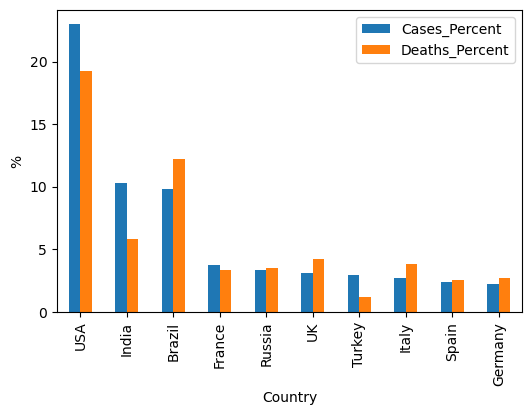

In [20]:
plt.rcParams['figure.dpi'] = 100
temp_df.plot(kind='bar', x='Country, Other', y=['Cases_Percent', 'Deaths_Percent'])
plt.xlabel('Country')
plt.ylabel('%')
plt.show()

---

### 5. Có mối quan hệ nào giữa tổng số ca nhiễm và tổng số người chết hay không?

In [21]:
corr_matrix=df_day_16.corr()
corr_matrix

,Total Cases,New Cases,Total Deaths,New Death,Total Recovered,Active Case,Serious Critical,Tot Cases/1M pop,Death/1M pop,Total test,Test/1M pop,Population
Total Cases,1.000000,0.716161,0.949064,0.689348,0.997513,0.948866,0.818190,0.207986,0.274214,0.880584,0.044403,0.416265
New Cases,0.716161,1.000000,0.600480,0.680635,0.742667,0.564659,0.763097,0.088608,0.127027,0.674730,-0.015472,0.651893
Total Deaths,0.949064,0.600480,1.000000,0.756626,0.951034,0.871025,0.838195,0.209171,0.346393,0.780350,0.029832,0.338512
New Death,0.689348,0.680635,0.756626,1.000000,0.723750,0.485637,0.767341,0.148074,0.277050,0.432211,-0.035338,0.374022
Total Recovered,0.997513,0.742667,0.951034,0.723750,1.000000,0.924379,0.834368,0.211478,0.282230,0.876146,0.044613,0.435362
Active Case,0.948866,0.564659,0.871025,0.485637,0.924379,1.000000,0.690328,0.178604,0.213043,0.851287,0.042055,0.313236
Serious Critical,0.818190,0.763097,0.838195,0.767341,0.834368,0.690328,1.000000,0.204350,0.346765,0.666258,-0.011217,0.438800
Tot Cases/1M pop,0.207986,0.088608,0.209171,0.148074,0.211478,0.178604,0.204350,1.000000,0.820916,0.144602,0.477785,-0.084028
Death/1M pop,0.274214,0.127027,0.346393,0.277050,0.282230,0.213043,0.346765,0.820916,1.000000,0.182952,0.299774,-0.038320
Total test,0.880584,0.674730,0.780350,0.432211,0.876146,0.851287,0.666258,0.144602,0.182952,1.000000,0.109333,0.635526


<AxesSubplot:xlabel='Total Cases', ylabel='Total Deaths'>

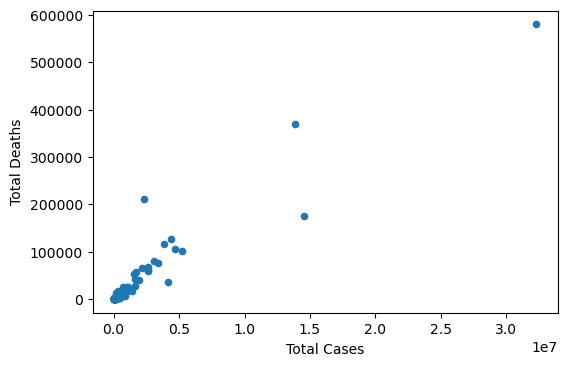

In [22]:
df_day_16.plot(kind = "scatter", x='Total Cases',y='Total Deaths')

#### Sử dụng Linear Regression để thể mối tương quan giữa Total Cases và Total Deaths

In [23]:
def TrainAndDraw_LinearRegression(df, column_X, column_y):
    model = LinearRegression()
    train_X = df[[column_X]]
    train_y = df[column_y]
    
    model.fit(train_X, train_y)
    w0 = model.intercept_
    w1 = model.coef_[0]
    # Trực quan hóa mô hình tìm được
    ax = df.plot.scatter(x=column_X, y=column_y)
    plt.xlabel(f"x ({column_X})")
    plt.ylabel(f"y ({column_y})")

    min_x = train_X.values.min() - 0.1
    max_x = train_X.values.max() + 0.1
    plt.xlim(min_x, max_x)
    plt.text(20000000,300000,"y = {} + {}*x".format(round(w0,2), round(w1,2)))
    plt.plot([min_x, max_x], model.predict(np.array([[min_x], [max_x]])), color='r');
    
    # Tính độ đo r^2 trên tập huấn luyện
    def compute_mse(y, preds):
        return ((y - preds) ** 2).mean()
    def compute_rr(y, preds, baseline_preds):
        return 1 - compute_mse(y, preds) / compute_mse(y, baseline_preds)
    baseline_preds = train_y.mean()
    print(f"Score: {compute_rr(train_y, model.predict(train_X), baseline_preds)}")
    print()

Score: 0.9007224384448773



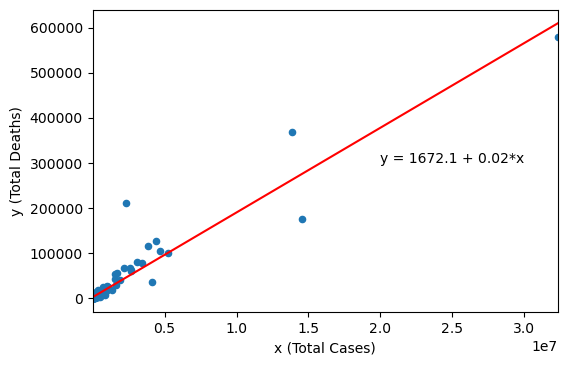

In [24]:
TrainAndDraw_LinearRegression(df_day_16, 'Total Cases', 'Total Deaths')

---

### 6. Sự phân bố giá trị của Tot Cases/1M pop và Death/1M pop

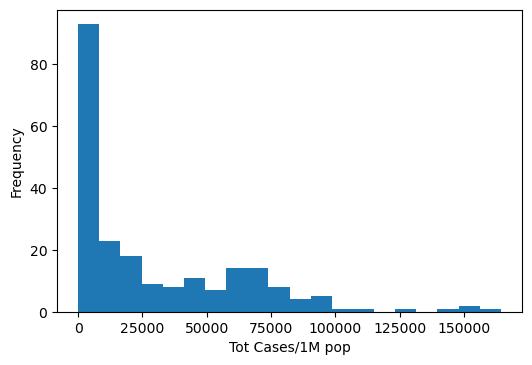

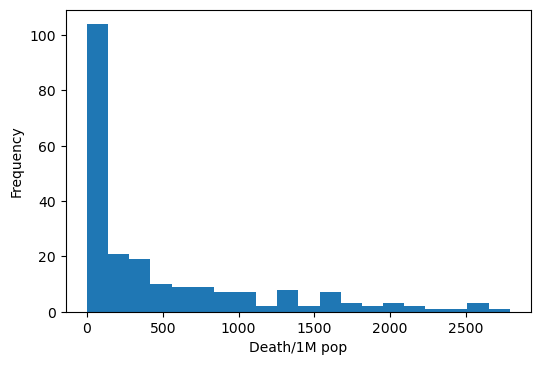

In [25]:
df_day_16['Tot Cases/1M pop'].plot(kind ="hist", bins=20)
plt.xlabel("Tot Cases/1M pop")
plt.show()

df_day_16['Death/1M pop'].plot(kind ="hist", bins=20)
#plt.hist(df_day_16['Death/1M pop'], bins=20)
plt.xlabel("Death/1M pop")
plt.show()